# Librerías a empregar

In [1]:
#Básicos
import pandas as pd
import numpy as np

#Graficar
import seaborn as sns
import matplotlib.pyplot as plt

#Sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree


#Outros
from scipy import stats
import warnings

# Análise exploratorio de datos

In [2]:
#Creo unha lista cos nomes das columnas e cargo os datos
attributes = ["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Rawah","Neota","Comanche_Peak","Cache_la_Poudre"] 
for i in range(1,41):
    soil ="Soil_%d" %(i)
    attributes.append(soil)
attributes.append("Cover_Type")
data = pd.read_csv("covtype.data",sep = ",", header = None, names = attributes)

In [4]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39,Soil_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


Como podemos ver, o noso DataFrame consiste en unha táboa de valores numéricos con **581012 mostras**, cada unha representando unha parcela de $90 m^2$. 

Temos 55 columnas das cales podemos extraer **13 atributos** xa que moitas destas conteñen valores binarios do mesmo atributo. Ademáis, unha delas correspóndese co tipo de cobertura forestal que queremos predecir, polo que usaremos algoritmos de aprendizaxe automática **supervisados** para a nosa tarefa.

Se nos fixamos nas columnas temos 2 que son: distancia horizontal a hidroloxía e distancia vertical. Dado que en tamaños tan pequenos de parcela non hai un cambio significativo de lalitude para que sexa necesaria unha diferenciación, podemos xuntar ambas columnas en unha que sexa directamente a distancia euclídea a unha fonte de auga e así reducimos de entrada a dimensionalidade en 1.

Aproveitamos de paso para crear unha copia do noso DataFrame (df) co que traballaremos.

In [3]:
df = data.copy() #Creamos copia

Text(0, 0.5, 'Tipos de dato')

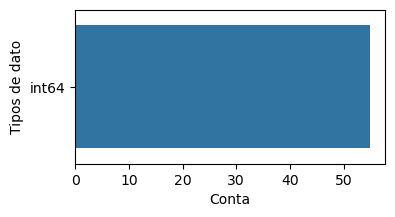

In [5]:
#Graficamos os tipos de dato respecto o número de cada un
plt.figure(figsize=(4,2))
sns.countplot(y=df.dtypes ,data=df)
plt.xlabel("Conta")
plt.ylabel("Tipos de dato")

In [18]:
#Comprobamos se existe algún NaN en todo o DataFrame
df.isna().values.any()

False

Imos ver en primeiro lugar como se distribúe o noso CoverType

In [25]:
df["Cover_Type"].describe()

count    581012.000000
mean          2.051471
std           1.396504
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Cover_Type, dtype: float64

<AxesSubplot:xlabel='Cover_Type', ylabel='Contas'>

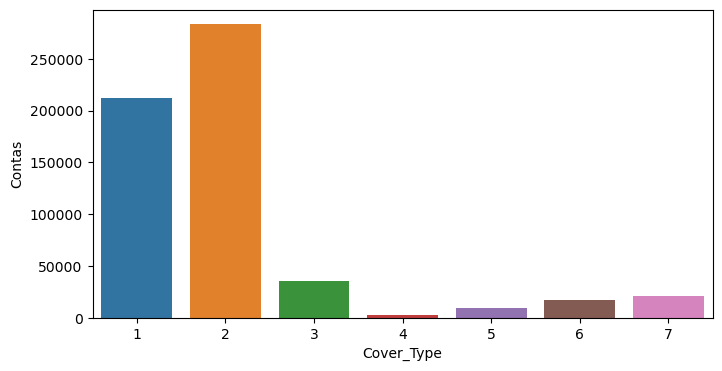

In [31]:
class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Contas'])
plt.figure(figsize=(8,4))
sns.barplot(x=class_label.index,y=class_label.Contas,data=class_label)

Imos separar en primeiro lugar o noso dataset en 5 distintos: 1 coas columnas continuas (máis outro igual coa columna de Cover_Type), 1 coas columnas binarias, 1 coas columnas da área silvestre e 1 cos tipos de chan.

In [4]:
cont_data=data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

cont_data_cover = cont_data.copy()
cont_data_cover['Cover_Type'] = data['Cover_Type'] 

binary_data=data.loc[:,'Rawah':'Soil_40']

Wilderness_data=data.loc[:,'Rawah': 'Cache_la_Poudre']

Soil_data=data.loc[:,'Soil_1':'Soil_40']

Imos comprobar como se distribúen os nosos datos.

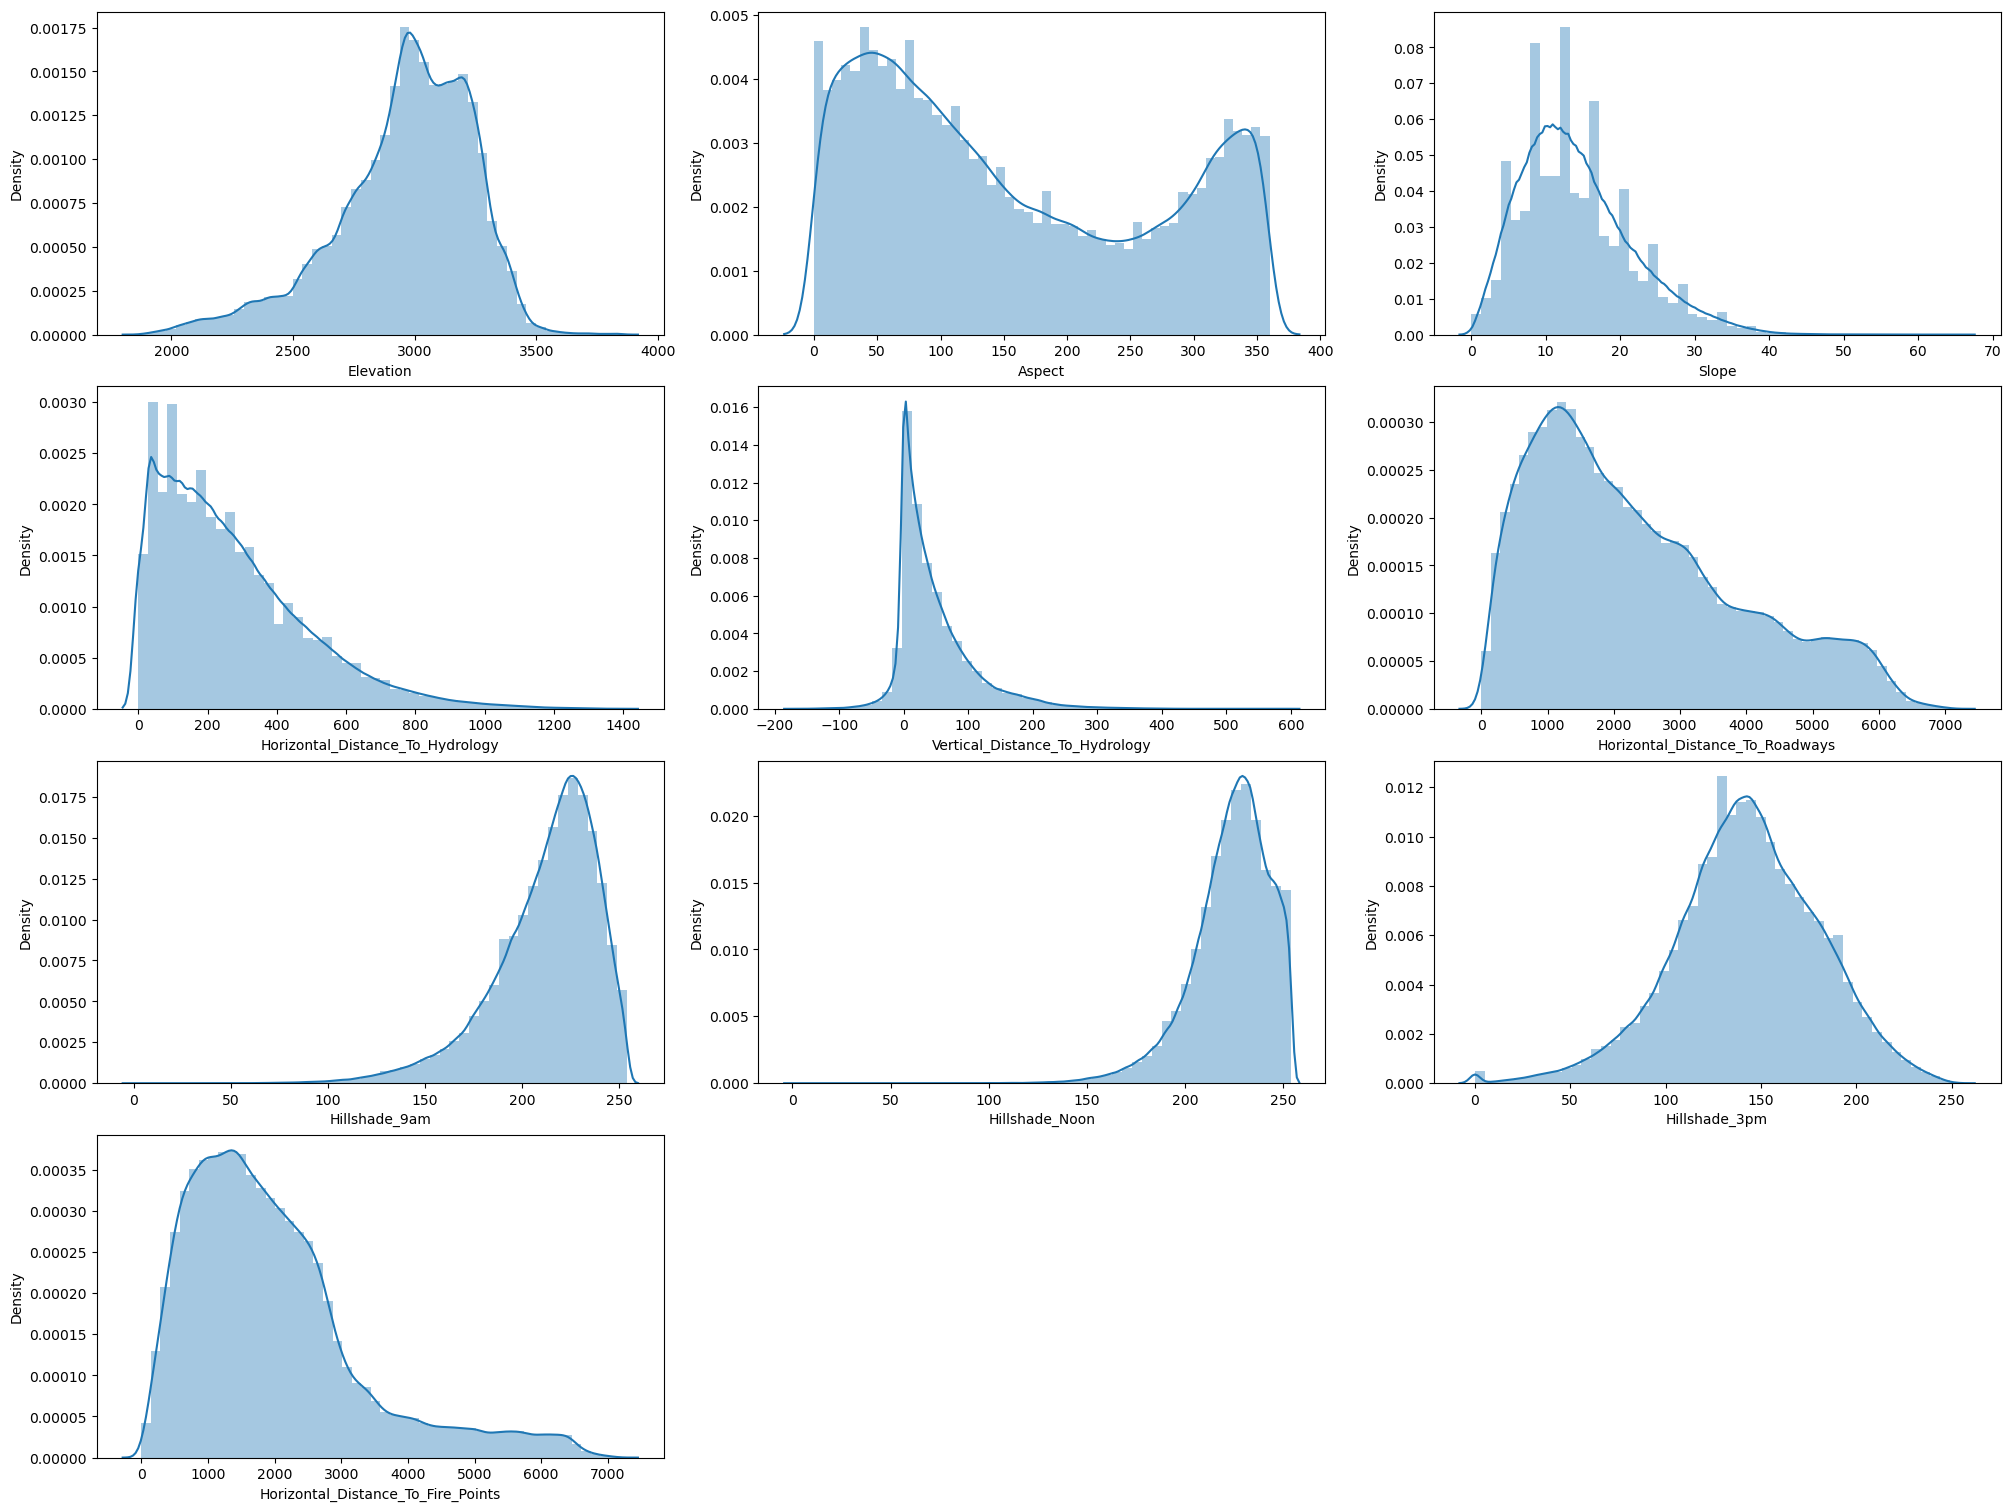

In [37]:
#Grafico as variables continuas
warnings.filterwarnings('ignore') 
#para ignorar uns avisos que indican que sns.distplot vai a ser quitada en versións futuras de seaborn
#se da fallo é porque na version de seaborn instalada xa non existe
fig = plt.figure(figsize=(20,15),layout='constrained')
for i, col in enumerate(cont_data.columns):
    ax = fig.add_subplot(4,3,i+1)
    sns.distplot(cont_data[col], ax = ax)

Comprobo as correlacións dos parámetros continuos xunto co Cover_Type

<AxesSubplot:>

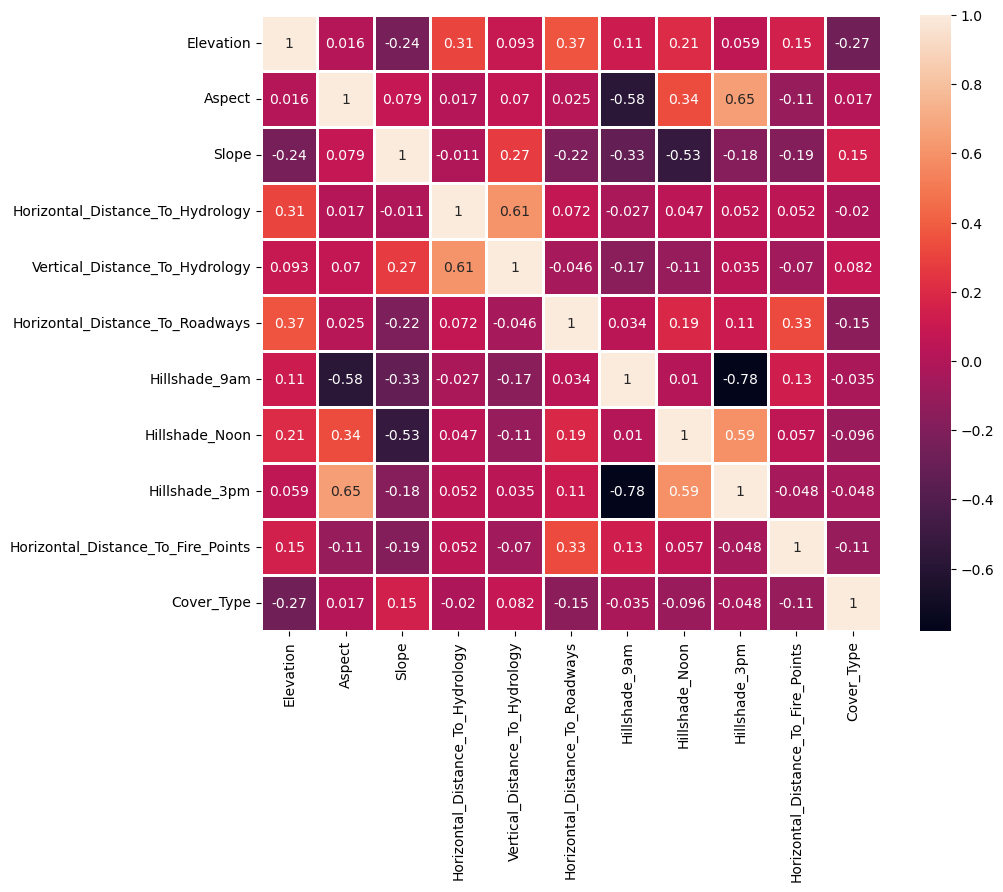

In [30]:
plt.figure(figsize=(10,8))

sns.heatmap(cont_data_cover.corr(),linecolor='white',linewidths=1,annot=True, xticklabels = True, yticklabels= True)

Grafico distribución covertypes por wilderness area. Para esto dado que son variables binarias vou a agrupar os 4 tipos de area silvestre en unha soa columna a partir de un bucle for que vaia contando as columnas nas que o valor é 1 (presencia). Finalmente esta columna engádoa ao dataset copia df que fixen antes.

In [43]:
def rev_code(row):
    for c in Wilderness_data.columns:
        if row[c]==1:
            return c  

df['Wilderness_Type']=Wilderness_data.apply(rev_code, axis=1)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Rawah'),
  Text(1, 0, 'Comanche_Peak'),
  Text(2, 0, 'Cache_la_Poudre'),
  Text(3, 0, 'Neota')])

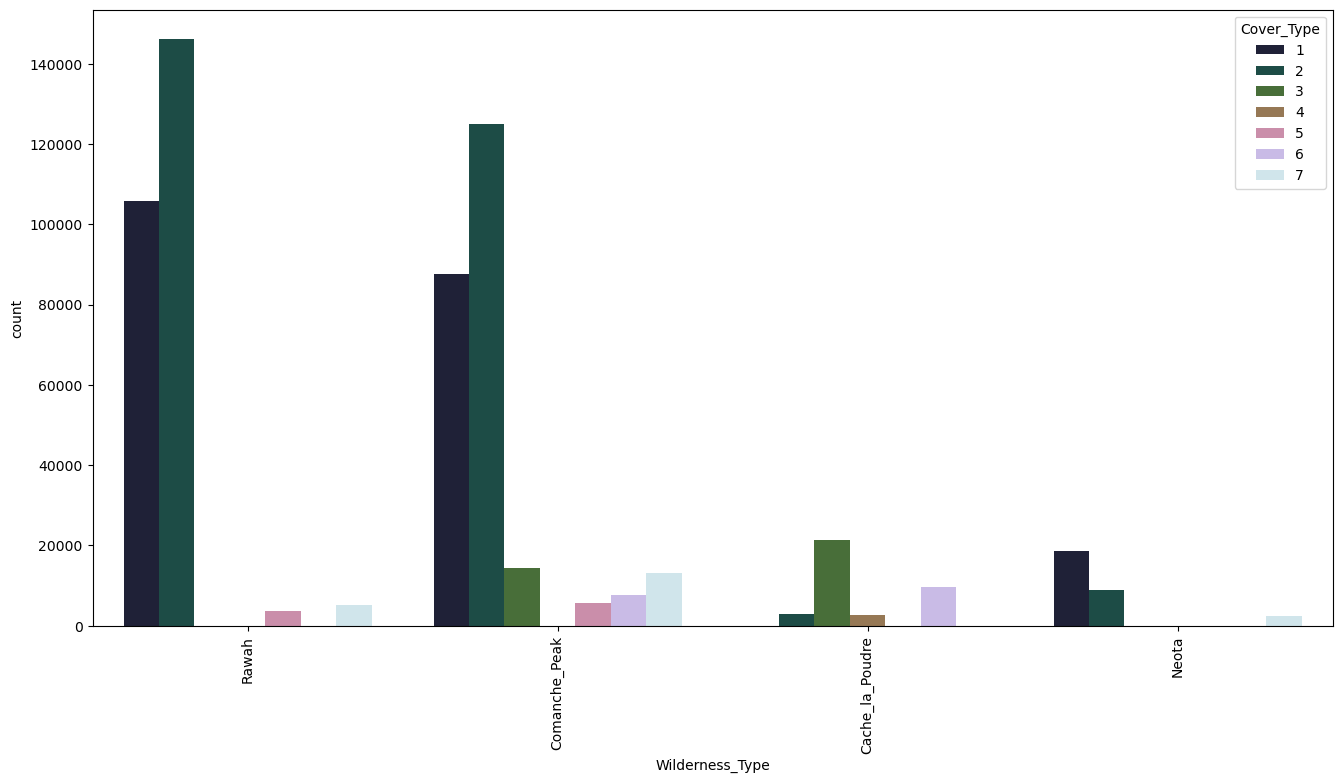

In [44]:
plt.figure(figsize=(16,8))
sns.countplot(x='Wilderness_Type', hue='Cover_Type',data=df, palette="cubehelix")
plt.xticks(rotation=90)

Facemos o mesmo para o tipo de chan.

In [46]:
#OLLO Á HORA DE EJECUTALO, LÉVALLE 2 MINUTOS APROX
def rev_code(row):
    for c in Soil_data.columns:
        if row[c]==1:
            return c  

df['Soil_Type']=Soil_data.apply(rev_code, axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Soil_29'),
  Text(1, 0, 'Soil_12'),
  Text(2, 0, 'Soil_30'),
  Text(3, 0, 'Soil_18'),
  Text(4, 0, 'Soil_16'),
  Text(5, 0, 'Soil_20'),
  Text(6, 0, 'Soil_24'),
  Text(7, 0, 'Soil_23'),
  Text(8, 0, 'Soil_40'),
  Text(9, 0, 'Soil_19'),
  Text(10, 0, 'Soil_8'),
  Text(11, 0, 'Soil_22'),
  Text(12, 0, 'Soil_39'),
  Text(13, 0, 'Soil_9'),
  Text(14, 0, 'Soil_38'),
  Text(15, 0, 'Soil_33'),
  Text(16, 0, 'Soil_31'),
  Text(17, 0, 'Soil_32'),
  Text(18, 0, 'Soil_11'),
  Text(19, 0, 'Soil_10'),
  Text(20, 0, 'Soil_5'),
  Text(21, 0, 'Soil_28'),
  Text(22, 0, 'Soil_4'),
  Text(23, 0, 'Soil_1'),
  Text(24, 0, 'Soil_13'),
  Text(25, 0, 'Soil_2'),
  Text(26, 0, 'Soil_17'),
  Text(27, 0, 'Soil_3'),
  Text(28, 0, 'Soil_34'),
  Text(29, 0, 'Soil_6'),
  Text(30, 0, 'Soil_14'),
  Text(31, 0, 'Soil_37'),


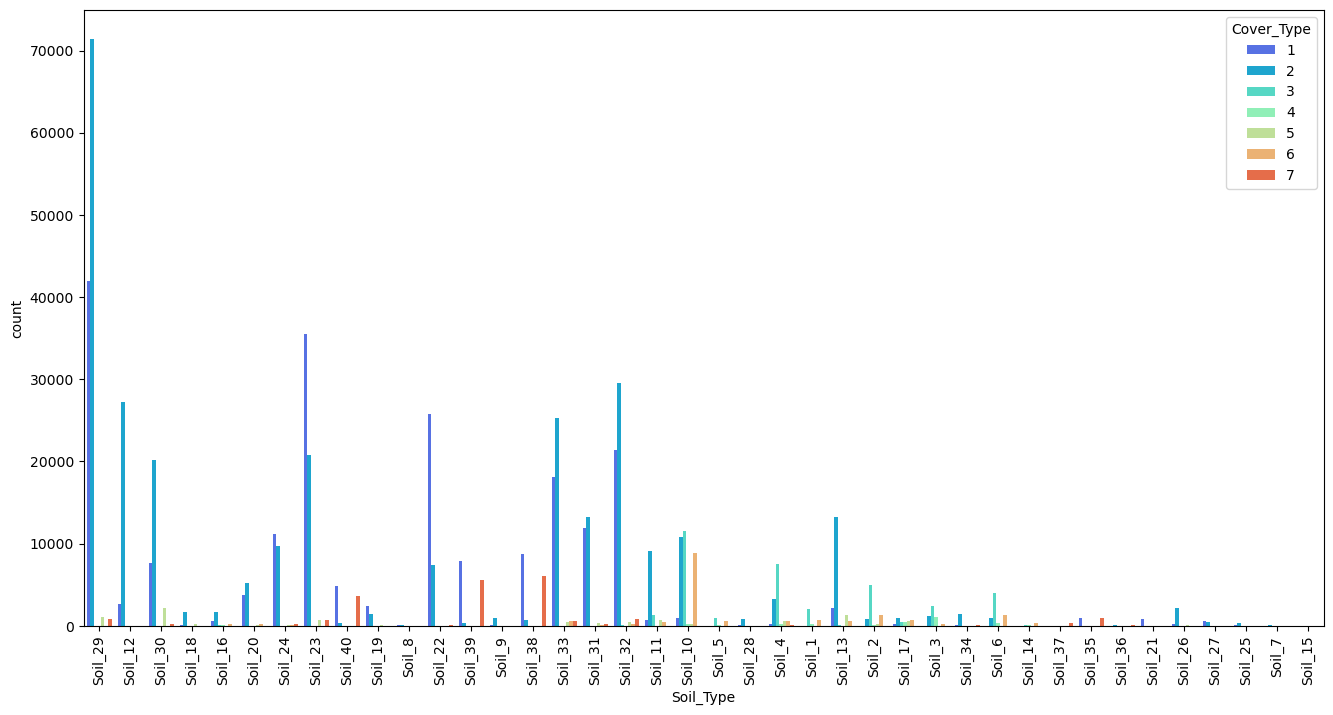

In [49]:
plt.figure(figsize=(16,8))
sns.countplot(x='Soil_Type', hue='Cover_Type',data=df, palette="rainbow")
plt.xticks(rotation=90)

Vemos que hai moitos Soil_# que a penas teñen exemplares. Imos comprobar cales teñen menos de 1000 (se estivesen distribuidos por igual cada un debería ter arredor de 14mil)

In [50]:
print('Soil Type',' Contas')
for col in binary_data:
    count=binary_data[col].value_counts()[1]
    if count < 1000:
        print(col,count)

Soil Type  Contas
Soil_7 105
Soil_8 179
Soil_14 599
Soil_15 3
Soil_21 838
Soil_25 474
Soil_28 946
Soil_36 119
Soil_37 298


# Tratamento dos datos
## Reducimos dimensionalidade
A pesar de existir métodos de feature selection para reducir a dimensionalidade por ahora imos facelo manualmente para aproveitar o análise estadístico que fixemos.

In [5]:
#Poñemos nunha lista parámetros a borrar
rem=['Hillshade_3pm','Soil_7','Soil_8','Soil_14','Soil_15','Soil_21','Soil_25','Soil_28','Soil_36','Soil_37']
df.drop(rem,axis=1,inplace=True)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Rawah,...,Soil_30,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_38,Soil_39,Soil_40,Cover_Type
0,2596,51,3,258,0,510,221,232,6279,1,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,6225,1,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,6121,1,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,6211,1,...,1,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,6172,1,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,837,0,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,845,0,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,854,0,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,864,0,...,0,0,0,0,0,0,0,0,0,3


**IMPORTANTE**: Deste xeito teremos o DataFrame *data* que se corresponde co orixinal sen modificacións e *df* que se corresponde co que lle faremos distintas cousas.

## Normalizamos os datos

Comprobamos se nos nosos datos hai valores negativos:

In [7]:
print("Negative values?")
for col in df.columns:
    print(col,":",(df[col] < 0).values.any())

Negative values?
Elevation : False
Aspect : False
Slope : False
Horizontal_Distance_To_Hydrology : False
Vertical_Distance_To_Hydrology : True
Horizontal_Distance_To_Roadways : False
Hillshade_9am : False
Hillshade_Noon : False
Horizontal_Distance_To_Fire_Points : False
Rawah : False
Neota : False
Comanche_Peak : False
Cache_la_Poudre : False
Soil_1 : False
Soil_2 : False
Soil_3 : False
Soil_4 : False
Soil_5 : False
Soil_6 : False
Soil_9 : False
Soil_10 : False
Soil_11 : False
Soil_12 : False
Soil_13 : False
Soil_16 : False
Soil_17 : False
Soil_18 : False
Soil_19 : False
Soil_20 : False
Soil_22 : False
Soil_23 : False
Soil_24 : False
Soil_26 : False
Soil_27 : False
Soil_29 : False
Soil_30 : False
Soil_31 : False
Soil_32 : False
Soil_33 : False
Soil_34 : False
Soil_35 : False
Soil_38 : False
Soil_39 : False
Soil_40 : False
Cover_Type : False


A columna Vertical_Distance_To_Hydrology contén valores negativos. Imos normalizar os parámetros continuos para poder corrixir a asimetría das nosas variables continuas.

In [6]:
#Redefinimos o DataFrame coas variables continuas empregando df pois ahora temos unha columna menos aquí. Aproveitamos para redefinir o resto de subsets.
cont_df=df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_df=df.loc[:,'Rawah':'Soil_40']

Wilderness_df=df.loc[:,'Rawah': 'Cache_la_Poudre']

Soil_df=df.loc[:,'Soil_1':'Soil_40']

In [7]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(cont_df)
scaled = scaler.fit_transform(cont_df)
scaled_cont_df = pd.DataFrame(scaled, columns = cont_df.columns)
scaled_cont_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.875366
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.867838
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.853339
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.865886
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.860449
...,...,...,...,...,...,...,...,...,...
581007,0.268634,0.425000,0.303030,0.060845,0.245478,0.015175,0.944882,0.933071,0.116688
581008,0.266133,0.422222,0.287879,0.047960,0.239018,0.013348,0.944882,0.933071,0.117803
581009,0.263632,0.441667,0.257576,0.042949,0.232558,0.012646,0.929134,0.948819,0.119058
581010,0.262631,0.472222,0.227273,0.042949,0.229974,0.012646,0.905512,0.964567,0.120452


## Asimetría
Miramos que asimetría temos.

In [84]:
print(scaled_cont_df.skew())

Elevation                            -0.817596
Aspect                                0.402628
Slope                                 0.789273
Horizontal_Distance_To_Hydrology      1.140437
Vertical_Distance_To_Hydrology        1.790250
Horizontal_Distance_To_Roadways       0.713679
Hillshade_9am                        -1.181147
Hillshade_Noon                       -1.063056
Horizontal_Distance_To_Fire_Points    1.288644
dtype: float64


Aplicamos a transformación do log (sumamos 1 para evitar problemas cos 0).

In [85]:
scaled_symm_df = scaled_cont_df.apply(lambda x: np.log(x+1) )
scaled_symm_df.skew()

Elevation                            -1.132227
Aspect                                0.198002
Slope                                 0.540999
Horizontal_Distance_To_Hydrology      0.813444
Vertical_Distance_To_Hydrology        1.487727
Horizontal_Distance_To_Roadways       0.458337
Hillshade_9am                        -1.430735
Hillshade_Noon                       -1.275665
Horizontal_Distance_To_Fire_Points    0.910360
dtype: float64

Tras ter probado con outras máis como as das raíces e a box cox non obtivemos mellores resultados, polo tanto imos quedarnos cos datos sen a transformación.

# Aplicación de modelos de Machine Learning
Comezamos definindo o noso conxunto de datos que empregaremos para entrenar o modelo e posteriormente validalo.

In [ ]:
#Dataset reducido
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#Dataset enteiro
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Random Forest
Imos facer o axuste tanto para o dataset reducido como o enteiro

In [11]:
%%time
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)
RFC.score(X_test,Y_test)

CPU times: total: 1min 36s
Wall time: 1min 36s


0.9565988158619424

Imos ver canto se diferencia se empregamos como DataFrame a *data*.

In [13]:
%%time
RFC2 = RandomForestClassifier()
RFC2.fit(x_train,y_train)
RFC2.score(x_test,y_test)

CPU times: total: 1min 38s
Wall time: 1min 39s


0.9520951900128511

Vemos que temos unha diferencia ínfima de mellora, o cal ten sentido pois as árbores de decisión e polo tanto os random forest tan especializados en datasets desbalanceados. Graficamos a importancia en ambos casos de cada parámetro.

<BarContainer object of 54 artists>

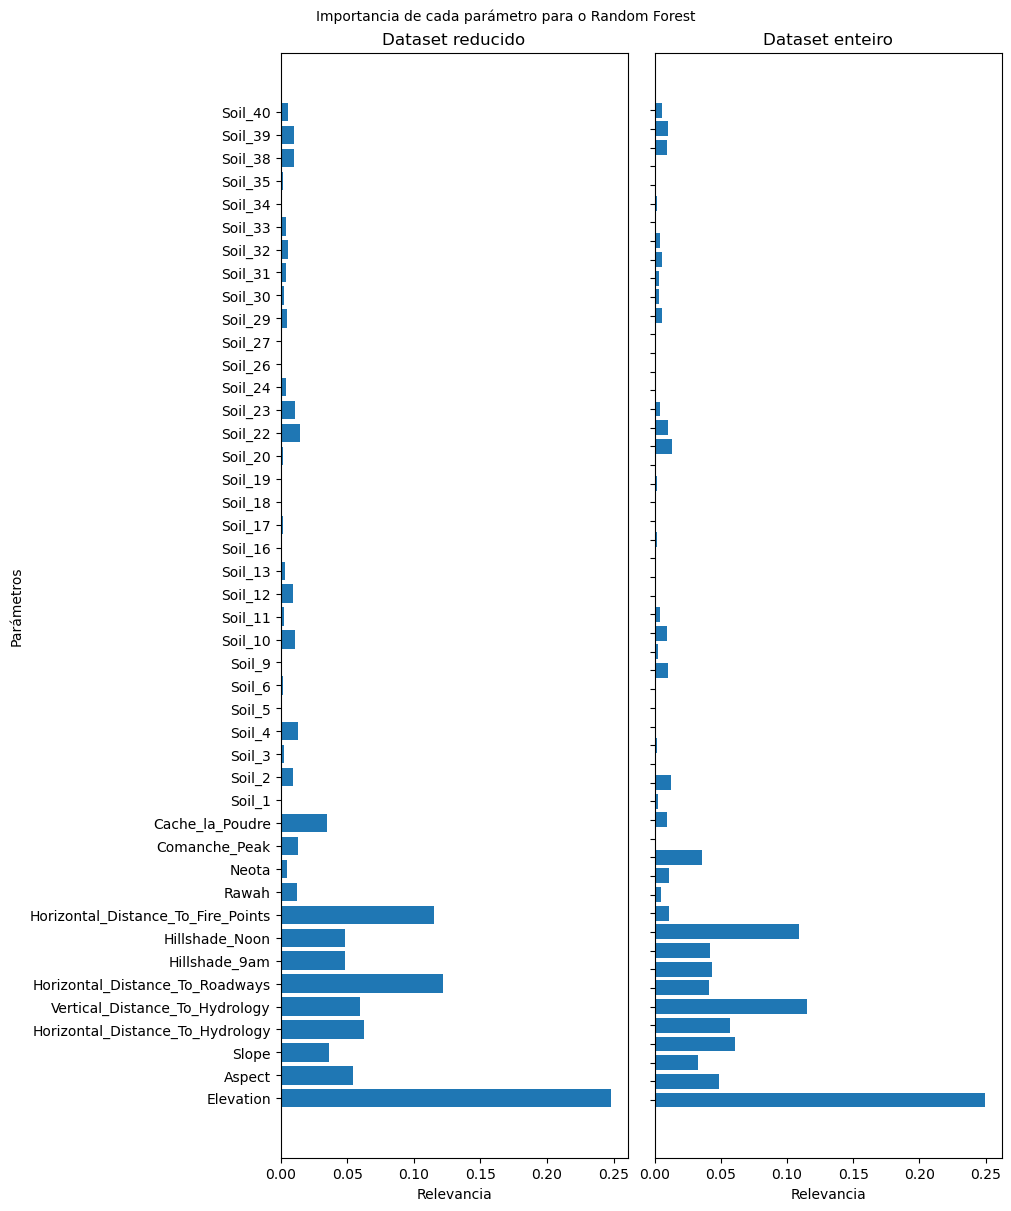

In [14]:
fig, axs = plt.subplots(1,2,figsize=(10,12),layout='constrained')
fig.suptitle('Importancia de cada parámetro para o Random Forest',fontsize=10)
axs[0].set_title('Dataset reducido')
axs[1].set_title('Dataset enteiro')
for ax in axs.flat:
    ax.set(xlabel='Relevancia', ylabel='Parámetros')
    ax.label_outer()

feat_dt1 = RFC.feature_importances_
feat_dt2 = RFC2.feature_importances_

axs[0].barh(X_train.columns.values, feat_dt1)
axs[1].barh(x_train.columns.values, feat_dt2)

Vemos que non hai diferencia en termos prácticos. Obtemos a mtriz de confusión.

In [12]:
Y_pred = RFC.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[60101,  3231,     0,     0,    21,    13,   132],
       [ 1887, 82941,   162,     1,   102,    89,    16],
       [    2,   154, 10189,    38,     7,   191,     0],
       [    0,     0,    97,   709,     0,    16,     0],
       [   32,   550,    19,     0,  2242,     7,     0],
       [    4,   140,   325,    26,     1,  4733,     0],
       [  263,    39,     0,     0,     0,     0,  5824]], dtype=int64)

In [13]:
print(classification_report(Y_test, Y_pred, target_names=["Clase 1","Clase 2","Clase 3","Clase 4","Clase 5","Clase 6","Clase 7"]))

              precision    recall  f1-score   support

     Clase 1       0.96      0.95      0.96     63498
     Clase 2       0.95      0.97      0.96     85198
     Clase 3       0.94      0.96      0.95     10581
     Clase 4       0.92      0.86      0.89       822
     Clase 5       0.94      0.79      0.86      2850
     Clase 6       0.94      0.91      0.92      5229
     Clase 7       0.98      0.95      0.96      6126

    accuracy                           0.96    174304
   macro avg       0.95      0.91      0.93    174304
weighted avg       0.96      0.96      0.96    174304



## Support Vector Machine

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>> NON EJECUTAR NON VAI A SER CAPAZ DE FACER O FIT<<<<<<<<<<<<<<<<<<<<<<<<< 

#%%time
#svm = SVC()
#svm.fit(X_train,Y_train)
#Y_pred = svm.predict(X_test)
#print(classification_report(Y_test, Y_pred, target_names=["Clase 1","Clase 2","Clase 3","Clase 4","Clase 5","Clase 6","Clase 7"]))

Dado que nos atopamos nunha situación na que o algoritmo non é capaz de facer o entrenamento cos 44 parámetros que obtivemos cando fixemos a redución, vamos a tratar de conseguir un resultado usando só as variables continuas que son as que tiveron máis relevancia según Random Forest.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_cont_df, Y, test_size=0.3, random_state=0)

In [ ]:
# TAMPOUCO DA UN RESULTADO

#%%time
#svm = SVC()
#svm.fit(X_train,Y_train)
#Y_pred = svm.predict(X_test)
#print(classification_report(Y_test, Y_pred, target_names=["Clase 1","Clase 2","Clase 3","Clase 4","Clase 5","Clase 6","Clase 7"]))

## Naive Bayes Classifier
Imos empregar sklearn.naive_bayes.GaussianNB, polo que imos empregar as variables continuas normalizadas para que se asemellen o máximo posible a distribucións normais coas que traballa este algoritmo.

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_cont_df, Y, test_size=0.3, random_state=0)

In [18]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
gnb.score(X_test,Y_test)

0.6352980998714889

In [21]:
Y_pred = gnb.predict(X_test)
confusion_matrix(Y_test,Y_pred)

array([[42997, 16175,   448,     0,   243,   180,  3455],
       [20604, 56640,  3900,     3,  1179,  1711,  1161],
       [    0,  1982,  7228,   282,     3,  1086,     0],
       [    0,     0,   351,   349,     0,   122,     0],
       [    0,  2204,   166,     0,   432,    48,     0],
       [    0,   901,  2689,   103,    15,  1521,     0],
       [ 4497,    35,    26,     0,     0,     0,  1568]], dtype=int64)

In [22]:
print(classification_report(Y_test, Y_pred, target_names=["Clase 1","Clase 2","Clase 3","Clase 4","Clase 5","Clase 6","Clase 7"]))

              precision    recall  f1-score   support

     Clase 1       0.63      0.68      0.65     63498
     Clase 2       0.73      0.66      0.69     85198
     Clase 3       0.49      0.68      0.57     10581
     Clase 4       0.47      0.42      0.45       822
     Clase 5       0.23      0.15      0.18      2850
     Clase 6       0.33      0.29      0.31      5229
     Clase 7       0.25      0.26      0.25      6126

    accuracy                           0.64    174304
   macro avg       0.45      0.45      0.44    174304
weighted avg       0.64      0.64      0.64    174304

